# Previsão da necessidade de cuidados intensivos

# Resumo

# Contexto do problema

# Escopo

# Importação dos pacotes

In [27]:
import pandas as pd
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectFromModel, SelectKBest, RFECV
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from pipelinehelper import PipelineHelper
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
import os
import logging, sys

In [2]:
warnings.filterwarnings('ignore')
logging.disable(sys.maxsize)
SEED = 64541

# Importações das funções locais

In [3]:
os.chdir("../funcoes")
from my_classifier import Classifier
os.chdir("../notebooks")

# Leitura dos dados pré-processados

In [4]:
df = pd.read_csv('../dados/dados_preprocessados/Kaggle_Sirio_Libanes_ICU_Prediction.csv')

In [5]:
sns.set_style('darkgrid')

In [6]:
df.head()

,AGE_ABOVE65,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,...,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,ICU,AGE_UNDER_30th,AGE_UNDER_50th,AGE_ABOVE_80th
0,1,0,0,0,0,1,1,0,0,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,1,1,1,0
2,0,0,0,0,0,0,0,0,1,1,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0,1,1,0
4,0,0,0,0,0,0,0,0,0,1,...,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0,1,1,0


# Validação Cruzada

A validação cruzada é um método estatístico usado para estimar a habilidade dos modelos de aprendizado de máquina, portanto a fim de tentar resumir a performance de um modelo de Machine Learning e, escolher o melhor modelo para o problema em questão. Essa técnica consiste em realizar divisões dentro do dataset inteiro entre dados de treino e teste de forma const 

![CV](../img/dataml_cross_validation.png)

### RepeatedStratifiedKFold

porém realizando divisões no dataset de forma que as proporções da variável dependente se mantivessem as mais próximas possíveis em toda a divisão, e além disso realizando essa validação cruzada diversas vezes para que, com isso, consiga resumir a performance de um modelo da maneira mais realista possível.

# Métricas

# Primeiros modelos

In [7]:
lr = Classifier(LogisticRegression, df, max_iter=1000)
lr.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LogisticRegression(max_iter=1000)
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média
----------------------------------------------------------------------------------
ROC AUC MÉDIA      : 0.746 ± 0.016     
----------------------------------------------------------------------------------
ACCURACY  MÉDIA    : 0.698 ± 0.017 
PRECISÃO  MÉDIA    : 0.675 ± 0.023 
RECALL MÉDIO       : 0.640 ± 0.018 
F1-SCORE  MÉDIO    : 0.643 ± 0.020

TEMPO MÉDIO DE TREINAMENTO:0.036


In [8]:
dt = Classifier(DecisionTreeClassifier, df)
dt.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : DecisionTreeClassifier()
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média
----------------------------------------------------------------------------------
ROC AUC MÉDIA      : 0.596 ± 0.016     
----------------------------------------------------------------------------------
ACCURACY  MÉDIA    : 0.629 ± 0.016 
PRECISÃO  MÉDIA    : 0.599 ± 0.017 
RECALL MÉDIO       : 0.596 ± 0.016 
F1-SCORE  MÉDIO    : 0.595 ± 0.016

TEMPO MÉDIO DE TREINAMENTO:0.005


In [9]:
rf = Classifier(RandomForestClassifier, df)
rf.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : RandomForestClassifier()
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média
----------------------------------------------------------------------------------
ROC AUC MÉDIA      : 0.760 ± 0.015     
----------------------------------------------------------------------------------
ACCURACY  MÉDIA    : 0.709 ± 0.012 
PRECISÃO  MÉDIA    : 0.691 ± 0.018 
RECALL MÉDIO       : 0.652 ± 0.013 
F1-SCORE  MÉDIO    : 0.656 ± 0.014

TEMPO MÉDIO DE TREINAMENTO:0.155


In [10]:
et = Classifier(ExtraTreesClassifier, df)
et.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : ExtraTreesClassifier()
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média
----------------------------------------------------------------------------------
ROC AUC MÉDIA      : 0.729 ± 0.017     
----------------------------------------------------------------------------------
ACCURACY  MÉDIA    : 0.680 ± 0.015 
PRECISÃO  MÉDIA    : 0.655 ± 0.022 
RECALL MÉDIO       : 0.613 ± 0.015 
F1-SCORE  MÉDIO    : 0.614 ± 0.017

TEMPO MÉDIO DE TREINAMENTO:0.13


In [11]:
xg = Classifier(XGBClassifier, df, verbosity=0)
xg.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média
----------------------------------------------------------------------------------


In [12]:
lgbm = Classifier(LGBMClassifier, df, verbosity=-1)
lgbm.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LGBMClassifier(verbosity=-1)
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média
----------------------------------------------------------------------------------
ROC AUC MÉDIA      : 0.758 ± 0.013     
----------------------------------------------------------------------------------
ACCURACY  MÉDIA    : 0.716 ± 0.013 
PRECISÃO  MÉDIA    : 0.693 ± 0.016 
RECALL MÉDIO       : 0.672 ± 0.015 
F1-SCORE  MÉDIO    : 0.676 ± 0.015

TEMPO MÉDIO DE TREINAMENTO:0.027


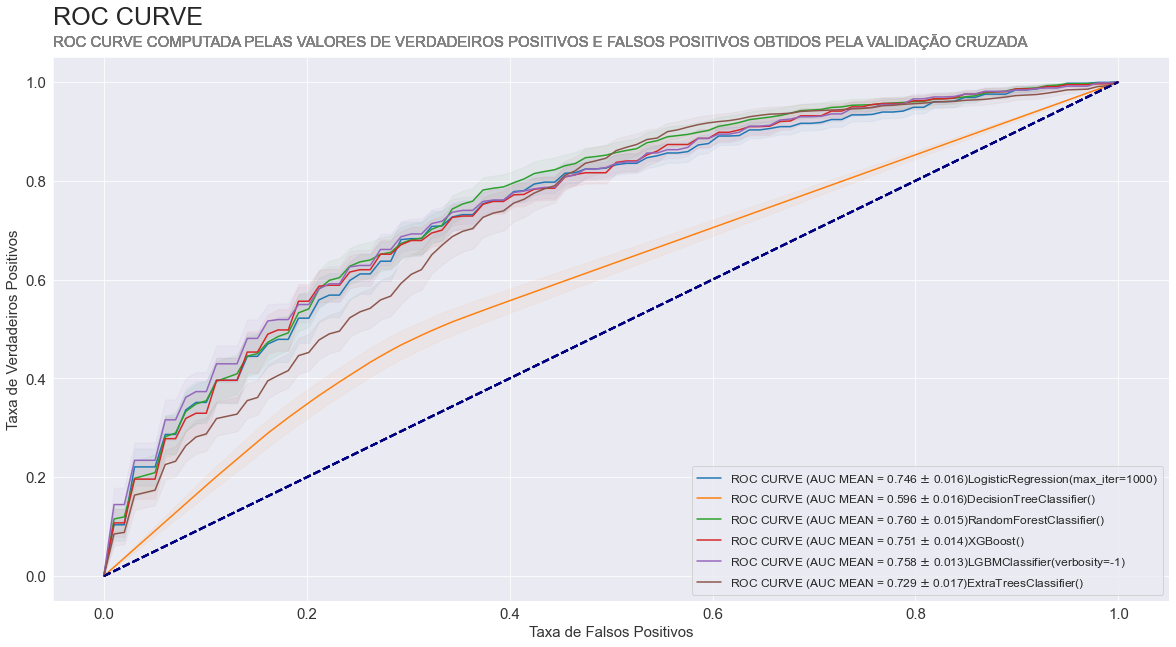

In [13]:
ax = lr.plot_roc_curve()
dt.plot_roc_curve(ax=ax)
rf.plot_roc_curve(ax=ax)
xg.plot_roc_curve(ax=ax, name_estimator='XGBoost()')
lgbm.plot_roc_curve(ax=ax)
et.plot_roc_curve(ax=ax)
plt.show()

# Reamostragem

In [14]:
df['ICU'].value_counts()

0    189
1    105
Name: ICU, dtype: int64

In [15]:
icu0 = df.query('ICU == 0')
icu1 = df.query('ICU == 1')

In [16]:
icu1_resample = resample(icu1,
                         n_samples=len(icu0),
                         random_state=SEED)

In [17]:
df_resample = pd.concat([icu1_resample, icu0], axis=0)
df_resample['ICU'].value_counts()

1    189
0    189
Name: ICU, dtype: int64

In [18]:
lr = Classifier(LogisticRegression, df_resample, max_iter=1000)
lr.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LogisticRegression(max_iter=1000)
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média
----------------------------------------------------------------------------------
ROC AUC MÉDIA      : 0.781 ± 0.013     
----------------------------------------------------------------------------------
ACCURACY  MÉDIA    : 0.727 ± 0.014 
PRECISÃO  MÉDIA    : 0.729 ± 0.014 
RECALL MÉDIO       : 0.727 ± 0.014 
F1-SCORE  MÉDIO    : 0.726 ± 0.014

TEMPO MÉDIO DE TREINAMENTO:0.036


In [19]:
rf = Classifier(RandomForestClassifier, df_resample)
rf.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : RandomForestClassifier()
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média
----------------------------------------------------------------------------------
ROC AUC MÉDIA      : 0.946 ± 0.007     
----------------------------------------------------------------------------------
ACCURACY  MÉDIA    : 0.864 ± 0.011 
PRECISÃO  MÉDIA    : 0.866 ± 0.011 
RECALL MÉDIO       : 0.864 ± 0.011 
F1-SCORE  MÉDIO    : 0.863 ± 0.011

TEMPO MÉDIO DE TREINAMENTO:0.159


In [20]:
et = Classifier(ExtraTreesClassifier, df_resample)
et.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : ExtraTreesClassifier()
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média
----------------------------------------------------------------------------------
ROC AUC MÉDIA      : 0.940 ± 0.008     
----------------------------------------------------------------------------------
ACCURACY  MÉDIA    : 0.867 ± 0.011 
PRECISÃO  MÉDIA    : 0.870 ± 0.010 
RECALL MÉDIO       : 0.867 ± 0.011 
F1-SCORE  MÉDIO    : 0.867 ± 0.011

TEMPO MÉDIO DE TREINAMENTO:0.127


In [21]:
xg = Classifier(XGBClassifier, df_resample, verbosity=0)
xg.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média
----------------------------------------------------------------------------------


In [22]:
lgbm = Classifier(LGBMClassifier, df_resample, verbosity=-1)
lgbm.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

10 repetições de Validação Cruzada com 5 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LGBMClassifier(verbosity=-1)
----------------------------------------------------------------------------------
Métricas no dataset de teste:             
Intervalo de 95% da média
----------------------------------------------------------------------------------
ROC AUC MÉDIA      : 0.939 ± 0.008     
----------------------------------------------------------------------------------
ACCURACY  MÉDIA    : 0.860 ± 0.010 
PRECISÃO  MÉDIA    : 0.864 ± 0.010 
RECALL MÉDIO       : 0.860 ± 0.010 
F1-SCORE  MÉDIO    : 0.860 ± 0.010

TEMPO MÉDIO DE TREINAMENTO:0.035


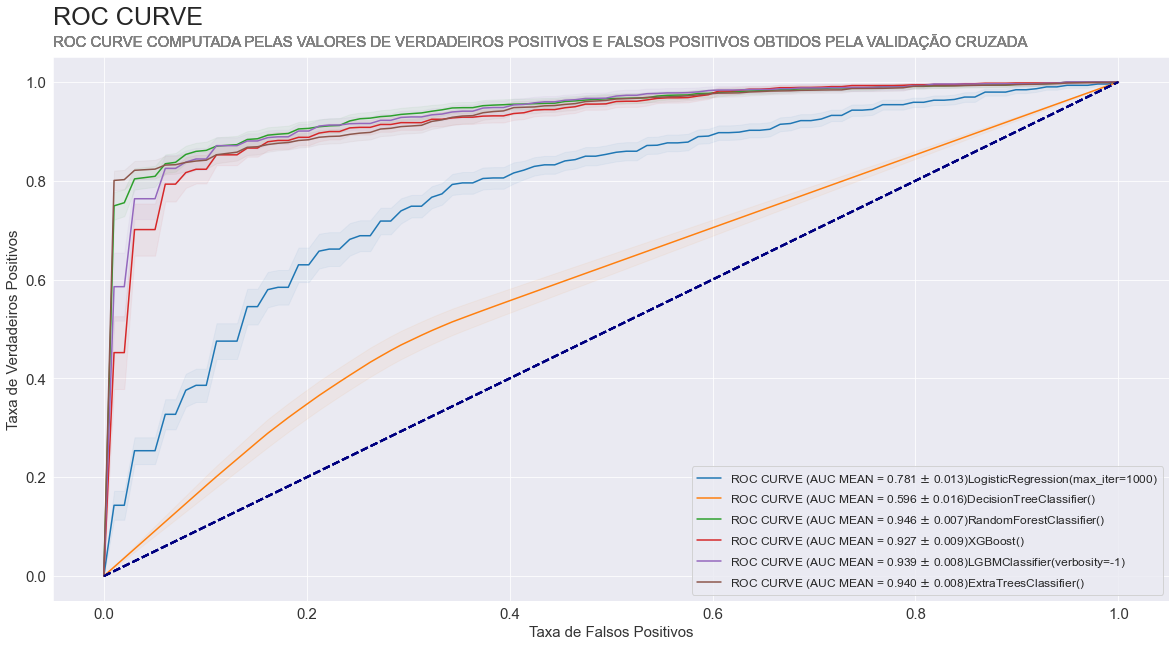

In [23]:
ax = lr.plot_roc_curve()
dt.plot_roc_curve(ax=ax)
rf.plot_roc_curve(ax=ax)
xg.plot_roc_curve(ax=ax, name_estimator='XGBoost()')
lgbm.plot_roc_curve(ax=ax)
et.plot_roc_curve(ax=ax)
plt.show()

### Otimização dos hiperparâmetros

In [24]:
import time

In [25]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=SEED)
X = df_resample.drop('ICU', axis=1)
y = df_resample['ICU']

In [28]:
pipe = Pipeline([
    ('feature_selection', PipelineHelper([
        ('lr', SelectFromModel(LogisticRegression())),
        ('rf',  SelectFromModel(RandomForestClassifier()))])),
    ('classifier', PipelineHelper([
        ('rf', RandomForestClassifier()),
        ('et', ExtraTreesClassifier()),
        ('lgbm', LGBMClassifier())
    ])),
])

params = {
    'feature_selection__selected_model': pipe.named_steps['feature_selection'].generate({
        'lr__threshold': [0, 'mean', 'median'],
        'rf__threshold': [0, 'mean', 'median'],
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        'rf__max_depth': [None, 5, 10, 15,20],
        'rf__random_state' : [SEED],
        'rf__n_estimators': [100, 200, 400],
        'rf__min_samples_split': [1, 2, 3, 5],
        'et__random_state' : [SEED],
        'et__max_depth': [None, 5, 10, 15, 20],
        'et__n_estimators': [100, 200, 400],
        'et__min_samples_split': [1, 2, 3, 5],
        'lgbm__random_state' : [SEED],
        'lgbm__n_estimators': [100, 200, 400],
        'lgbm__boosting_type':['dart', 'goss', 'gbdt'],
        'lgbm__max_depth': [None, 5, 10, 15, 20],
        'lgbm__num_leaves': [10, 25, 50]
    })
}
grid = RandomizedSearchCV(pipe, params, n_jobs=-1, cv=cv, scoring='roc_auc', n_iter=1000, random_state=SEED)
start = time.time()
grid.fit(X,y)
end=time.time()
print('Os parâmetros do modelo com o melhor resultagrid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
print(f'O tempo para essa procura foi de {end-start} segundos')

{'feature_selection__selected_model': ('rf', {'threshold': 'mean'}), 'classifier__selected_model': ('et', {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 400})}
0.9454020363854159
Pipeline(steps=[('feature_selection',
                 PipelineHelper(available_models={'lr': SelectFromModel(estimator=LogisticRegression()),
                                                  'rf': SelectFromModel(estimator=RandomForestClassifier(),
                                                                        threshold='mean')},
                                selected_model=SelectFromModel(estimator=RandomForestClassifier(),
                                                               threshold='mean'))),
                ('classifier',
                 PipelineHelper(available_models={'et': ExtraTreesClassifier(n_estimators=400),
                                                  'lgbm': LGBMClassifier(),
                                                  'rf': RandomForestClassifier(

# Validação dos resultados

A fim de se obter a maior certeza nesses resultados e, testar se essa validação cruzada com 10 divisões e 5 repetições é a ideal vou testar a hipótese nula que as métricas obtidas seguem uma distribuição normal, e com isso, podemos definir, de forma confirmatória, o intervalo de confiança para média de cada métrica igual a:

## $$\mu = \bar{x} \pm \frac{\sigma}{\sqrt{n}}$$

#### Onde $\mu$ é a média populacional, $\bar{x}$ é a média da amostra das métricas calculadas, $\sigma$ é o desvio padrão amostral calculado e n é o tamanho da amostra, que no nosso caso é 50, 5 repetiçoes e 10 divisões do dataset $5\:X\:10 = 50$

Primeiramente vou observar essas métricas por meio de um histograma a fim de entender suas distribuições.

### LogisticRegression

In [ ]:
rf.hist_metrics(kde=True, bins=5, show=False)
plt.show()